<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [1]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sc
from src import soporte_nulos as sn

In [2]:
df = pd.read_csv("../data/autorenew_clean.csv", index_col=0)

In [3]:
df.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,price_knn,yearOfRegistration_knn,powerCV_knn,kilometer_knn,monthOfRegistration_knn,nrOfPictures_knn,postalCode_knn
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,2016-03-24 00:00:00,2016-04-07 03:16:57,480.0,1993.0,0.0,150000.0,0.0,0.0,70435.0
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50,18300.0,2011.0,187.0,125000.0,5.0,0.0,66954.0
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,Unknown,2016-03-14 00:00:00,2016-04-05 12:47:46,9800.0,2004.0,161.0,125000.0,8.0,0.0,90480.0
3,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17,1500.0,2001.0,74.0,150000.0,6.0,0.0,91074.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21,3600.0,2008.0,68.0,90000.0,7.0,0.0,60437.0


In [4]:
sc.exploracion_datos(df)

El número de filas es 371499 y el número de columnas es 19

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Series([], dtype: float64)


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price_knn,371499.0,17295.957876,3.588094e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration_knn,371499.0,2004.578311,9.287018e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV_knn,371499.0,113.967653,1.895232e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer_knn,371499.0,125619.221048,4.011236e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration_knn,371499.0,5.734414,3.712406e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures_knn,371499.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode_knn,371499.0,50820.195696,2.579932e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,371499,233531,Ford_Fiesta,657
seller,371499,2,private,371496
offerType,371499,2,offer,371487
abtest,371499,2,test,192575
vehicleType,371499,8,Unknown,133757
gearbox,371499,3,manually,274193
model,371499,252,golf,30070
fuelType,371499,8,petrol,223841
brand,371499,40,volkswagen,79638
notRepairedDamage,371499,3,no,263159



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 371499 entries, 0 to 371498
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   name                     371499 non-null  object 
 1   seller                   371499 non-null  object 
 2   offerType                371499 non-null  object 
 3   abtest                   371499 non-null  object 
 4   vehicleType              371499 non-null  object 
 5   gearbox                  371499 non-null  object 
 6   model                    371499 non-null  object 
 7   fuelType                 371499 non-null  object 
 8   brand                    371499 non-null  object 
 9   notRepairedDamage        371499 non-null  object 
 10  dateCreated              371499 non-null  object 
 11  lastSeen                 371499 non-null  object 
 12  price_knn                371499 non-null  float64
 13  

None

**Decidimos que esta es categorica y la convertimos a Object y no la tratamos como numerica.**

- **monthOfRegistration**: Mes de registro del coche.

In [5]:
df['monthOfRegistration_knn'] = df['monthOfRegistration_knn'].astype("O")

In [6]:

escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_robust", "kilometer_Ratesrobust", "yearOfRegistration_Ratesrobust"]] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_min_max", "kilometer_min_max", "yearOfRegistration_min_max"]]  = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_norm", "kilometer_norm", "yearOfRegistration_norm"]]  = datos_transf_norm

escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df[["powerCV_knn", "kilometer_knn","yearOfRegistration_knn"]])
df[["powerCV_estandar", "kilometer_estandar", "yearOfRegistration_estandar"]]  = datos_transf_estandar

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_knn,371499.0,1.729596e+04,3.588094e+06,0.000000,1150.000000,2950.000000,7200.000000,2.147484e+09
yearOfRegistration_knn,371499.0,2.004578e+03,9.287018e+01,1000.000000,1999.000000,2003.000000,2008.000000,9.999000e+03
powerCV_knn,371499.0,1.139677e+02,1.895232e+02,0.000000,69.000000,104.000000,148.000000,1.972600e+04
kilometer_knn,371499.0,1.256192e+05,4.011236e+04,5000.000000,125000.000000,150000.000000,150000.000000,1.500000e+05
nrOfPictures_knn,371499.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
postalCode_knn,371499.0,5.082020e+04,2.579932e+04,1067.000000,30459.000000,49610.000000,71546.000000,9.999800e+04
powerCV_robust,371499.0,1.261728e-01,2.399028e+00,-1.316456,-0.443038,0.000000,0.556962,2.483797e+02
kilometer_Ratesrobust,371499.0,-9.752312e-01,1.604495e+00,-5.800000,-1.000000,0.000000,0.000000,0.000000e+00
yearOfRegistration_Ratesrobust,371499.0,1.753679e-01,1.031891e+01,-111.444444,-0.444444,0.000000,0.555556,8.884444e+02
powerCV_min_max,371499.0,5.777535e-03,9.607788e-03,0.000000,0.003498,0.005272,0.007503,1.000000e+00


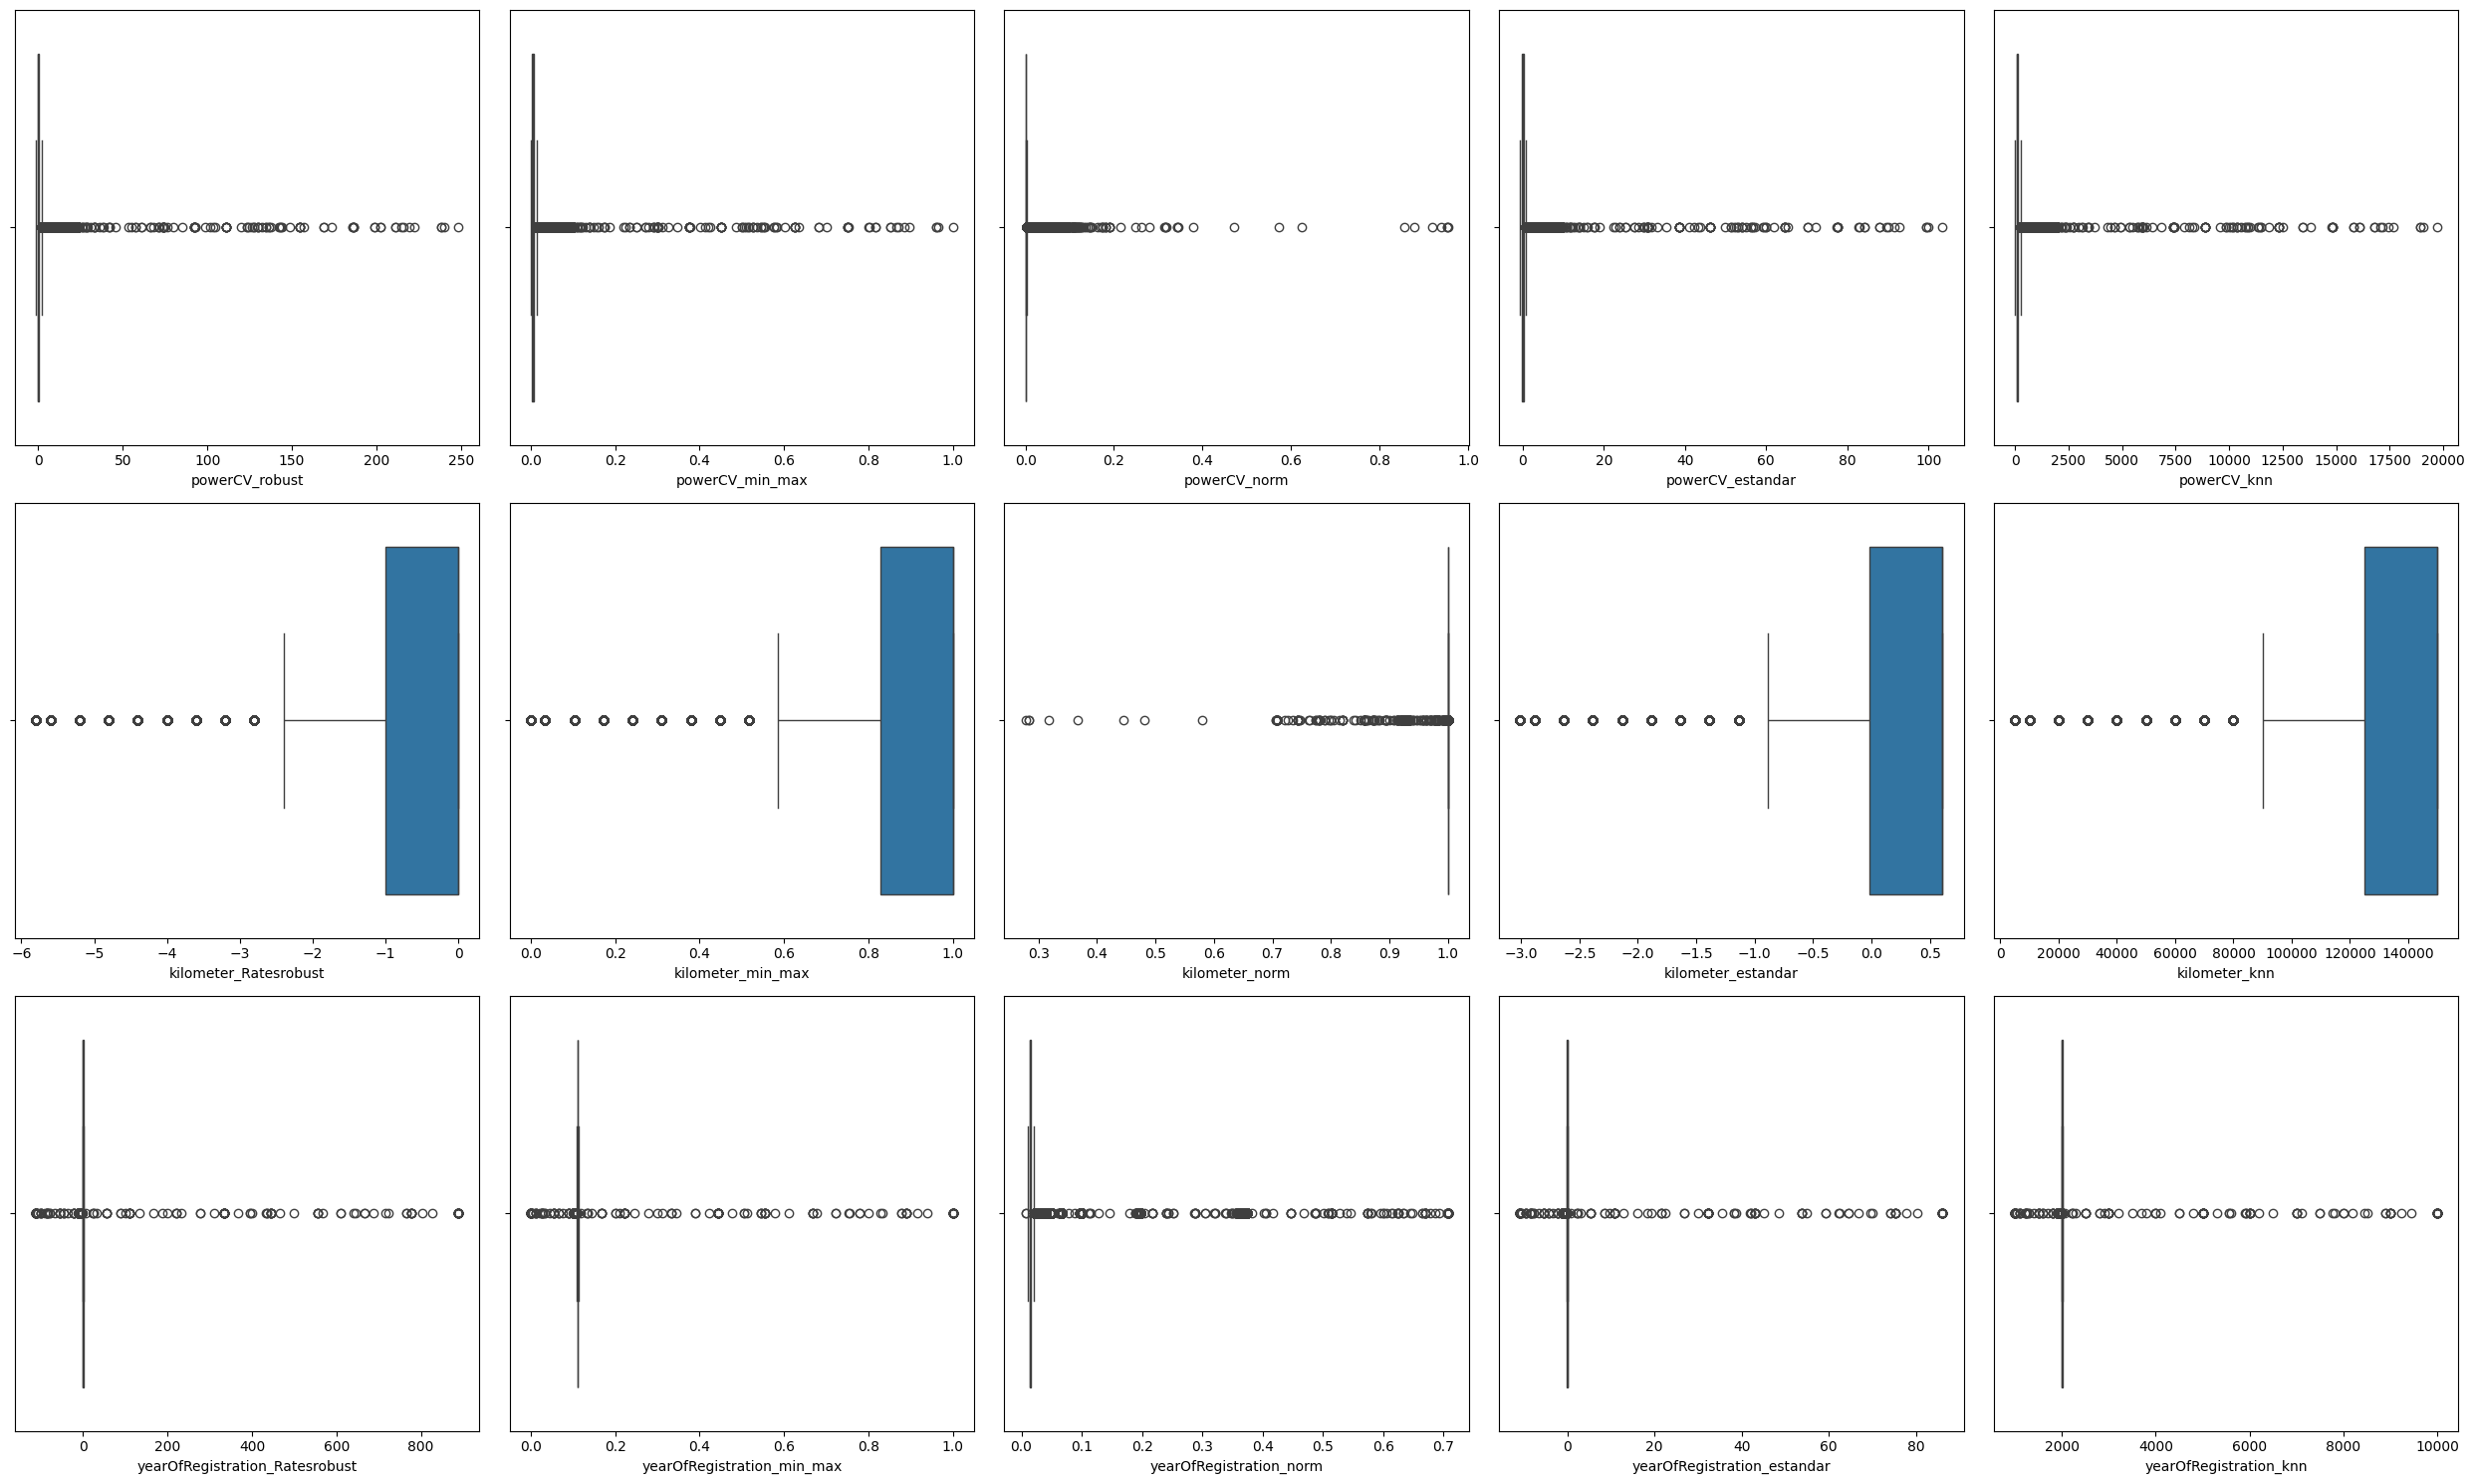

In [9]:

fig , axes = plt.subplots(nrows=3 , ncols=5, figsize = (25, 15))

sns.boxplot(x = "powerCV_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "powerCV_min_max", data = df, ax = axes[0][1])
sns.boxplot(x = "powerCV_norm", data = df, ax = axes[0][2])
sns.boxplot(x = "powerCV_estandar", data = df, ax = axes[0][3])
sns.boxplot(x = "powerCV_knn", data = df, ax = axes[0][4])

sns.boxplot(x = "kilometer_Ratesrobust", data = df, ax = axes[1][0])
sns.boxplot(x = "kilometer_min_max", data = df, ax = axes[1][1])
sns.boxplot(x = "kilometer_norm", data = df, ax = axes[1][2])
sns.boxplot(x = "kilometer_estandar", data = df, ax = axes[1][3])
sns.boxplot(x = "kilometer_knn", data = df, ax = axes[1][4])

sns.boxplot(x = "yearOfRegistration_Ratesrobust", data = df, ax = axes[2][0])
sns.boxplot(x = "yearOfRegistration_min_max", data = df, ax = axes[2][1])
sns.boxplot(x = "yearOfRegistration_norm", data = df, ax = axes[2][2])
sns.boxplot(x = "yearOfRegistration_estandar", data = df, ax = axes[2][3])
sns.boxplot(x = "yearOfRegistration_knn", data = df, ax = axes[2][4])


plt.tight_layout()